In [103]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline


After several tests we found in almost all cases that training a function on every possibility is much more effective than randomly generating data.

In [104]:
data_inorder = pd.read_csv('Data\\adder_inorder_data.csv')
data_inorder = data_inorder[['Steps', 'MSE']]
data_inorder = data_inorder.sort_values(['Steps'])
data_inorder.head(9)

,Steps,MSE
0,100,386
3,200,344
1,300,306
2,400,279
5,500,250
6,600,210
7,700,179
8,800,156
9,900,129


In [105]:
data_rnd_0 = pd.read_csv('Data\\adder_random_0_data.csv')
data_rnd_0 = data_rnd_0[['Steps', 'MSE']]
data_rnd_0 = data_rnd_0.sort_values(['Steps'])

data_rnd_1 = pd.read_csv('Data\\adder_random_1_data.csv')
data_rnd_1 = data_rnd_1[['Steps', 'MSE']]
data_rnd_1 = data_rnd_1.sort_values(['Steps'])

data_rnd_2 = pd.read_csv('Data\\adder_random_2_data.csv')
data_rnd_2 = data_rnd_2[['Steps', 'MSE']]
data_rnd_2 = data_rnd_2.sort_values(['Steps'])

data_rnd_3 = pd.read_csv('Data\\adder_random_3_data.csv')
data_rnd_3 = data_rnd_3[['Steps', 'MSE']]
data_rnd_3 = data_rnd_3.sort_values(['Steps'])

data_rnd_4 = pd.read_csv('Data\\adder_random_4_data.csv')
data_rnd_4 = data_rnd_4[['Steps', 'MSE']]
data_rnd_4 = data_rnd_4.sort_values(['Steps'])

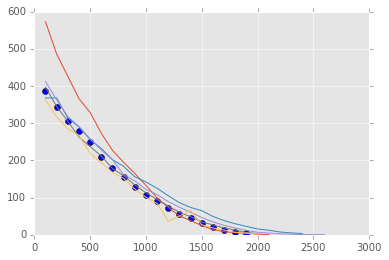

In [106]:
plt.plot(data_inorder['Steps'].ix[:20], data_inorder['MSE'].ix[:20], 'bo',
         data_rnd_0['Steps'].ix[:20], data_rnd_0['MSE'].ix[:20],
        data_rnd_1['Steps'].ix[:20], data_rnd_1['MSE'].ix[:20],
        data_rnd_2['Steps'].ix[:20], data_rnd_2['MSE'].ix[:20],
        data_rnd_3['Steps'].ix[:20], data_rnd_3['MSE'].ix[:20],
        data_rnd_4['Steps'].ix[:20], data_rnd_4['MSE'].ix[:20])
plt.show()

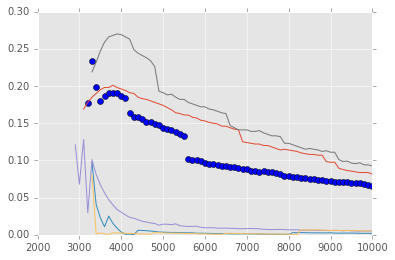

In [107]:
plt.plot(data_inorder['Steps'].ix[30:], data_inorder['MSE'].ix[30:], 'bo',
         data_rnd_0['Steps'].ix[30:], data_rnd_0['MSE'].ix[30:],
        data_rnd_1['Steps'].ix[30:], data_rnd_1['MSE'].ix[30:],
        data_rnd_2['Steps'].ix[30:], data_rnd_2['MSE'].ix[30:],
        data_rnd_3['Steps'].ix[30:], data_rnd_3['MSE'].ix[30:],
        data_rnd_4['Steps'].ix[30:], data_rnd_4['MSE'].ix[30:])
plt.show()

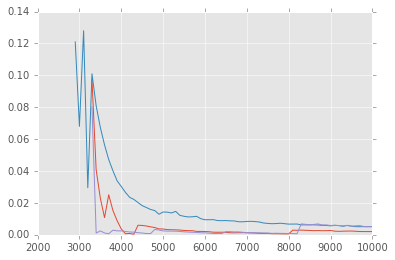

In [108]:
plt.plot(data_rnd_1['Steps'].ix[30:], data_rnd_1['MSE'].ix[30:],
        data_rnd_2['Steps'].ix[30:], data_rnd_2['MSE'].ix[30:],
        data_rnd_4['Steps'].ix[30:], data_rnd_4['MSE'].ix[30:])
plt.show()

#### adder(n): Adds 42 to n

Process:
* Tried different methods of generating data to find which worked the best
    * All possible values 0-100
    * 1000 random values 0-100
    * All possible values 0-100 10 times for a total of 1000 datum
    * All possible values 0-100 100 times for a total of 10000 datum
* Experimented with single layer hidden units 1-20
* Experimented with two layer hidden units [1-20, 1-20]
* Found how well each different neural net extrapolated to other values
* Tried to scale data up to learn 1-1000

Results:

<table>
    <thead>
        <td>Data</td>
        <td>MSE</td>
    </thead>
    <tr>
        <td>100 data: 1-100</td>
        <td>.065861</td>
    </tr>
    <tr>
        <td>1000 datum: random(100)</td>
        <td>.028475</td>
    </tr>
    <tr>
        <td>1000 datum: 1-100 10 times</td>
        <td>.007759</td>
    </tr>
    <tr>
        <td>10000 datum: 1-100 100 times</td>
        <td>409.116</td>
    </tr>
</table>

The results seemed to show that iterating through every possibility multiple times and then training on that is the best method of data gathering. As with many things in this, you have to find the fine line of having the right amount of data without having too much. 

I was interested in how far a neural net could extrapolate to numbers that it had never seen before. Although this should have been an easy problem because it is linear, it wasn't because SkFlow doesn't allow you to choose the activation function for your regressor. Most all of the single and double layer neural nets I trained failed around 200-300, however there was one that stood out and was able to correctly predict 1-1145 with just training on 1-100


In [109]:
data_inorder = pd.read_csv('Data\\adder_inorder_data.csv')
data_inorder = data_inorder[['Steps', 'MSE']]
data_inorder = data_inorder.sort_values(['Steps'])

In [110]:
arr = np.zeros(5)
arr[0] = 5

In [111]:
arr = ['100', '200', '300', '400', '500', '600', '700', 
       '1000','1100','1200','1300', '1400','1500', '1600','1700','1800', '1900',
      '2000', '2100', '2300', '2400', '2500']
df_arr = []
for i in range(len(arr)):
    temp = pd.read_csv('Data\\determinant_' + arr[i] +'_layer_by_100.csv', header=None)
    temp = temp.T
    temp.columns=['Second', 'MSE']
    temp['First'] = arr[i]
    temp = temp.sort_values(['First', 'Second'])
    df_arr.append(temp)
len(df_arr)

22

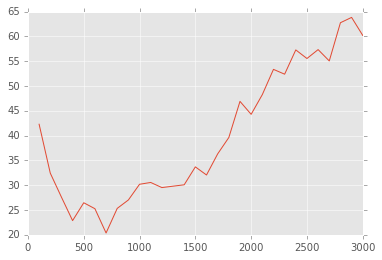

In [136]:
temp = pd.read_csv('Data\\determinant_layer_by_100.csv', header=None)
temp = temp.T
temp.columns=['MSE', 'Layer']
plt.plot(temp['Layer'], temp['MSE'])

In [131]:
frames = [df_arr[0], df_arr[1], df_arr[2], df_arr[3], df_arr[4], df_arr[5],
          df_arr[6], df_arr[7], df_arr[8], df_arr[9], df_arr[10], df_arr[11],
          df_arr[12], df_arr[13], df_arr[14], df_arr[15], df_arr[16], df_arr[17],
          df_arr[18], df_arr[19], df_arr[20], df_arr[21]]
result = pd.concat(frames)
result = result.reset_index(drop=True)
result.sort_values(['MSE'])

,Second,MSE,First
125,600,0.357921,500
170,2100,0.373738,600
86,2700,0.388915,300
51,2200,0.408906,200
12,1300,0.409569,100
64,500,0.418992,300
97,800,0.422525,400
173,2400,0.426857,600
122,300,0.431968,500
205,2600,0.438323,700


In [113]:
res1 = result.as_matrix(columns=['First'])
res2 = result.as_matrix(columns=['Second'])
res3 = result.as_matrix(columns=['MSE'])

ValueError: x and y must be 1D arrays of the same length

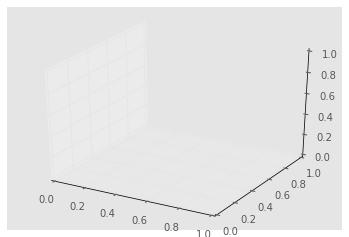

In [114]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(res1[:,0], res2[:,0], res3[:,0], cmap=cm.jet, linewidth=0.2)
plt.show()

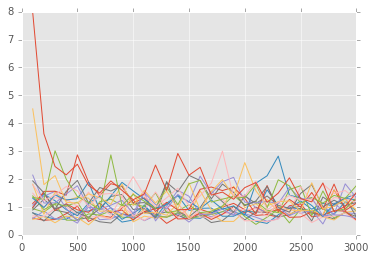

In [117]:
min = 30
for i in range(len(arr)):
    plt.plot(df_arr[i]['Second'], df_arr[i]['MSE'])
plt.show()

In [130]:
num = 5
df_arr[5].as_matrix(columns=['MSE']))
df_arr[5].head(21)

,Second,MSE,First
0,100,0.935536,600
1,200,0.818328,600
2,300,1.099286,600
3,400,0.525195,600
4,500,0.519247,600
5,600,0.749099,600
6,700,0.706251,600
8,800,0.856198,600
7,900,0.633568,600
9,1000,0.606479,600


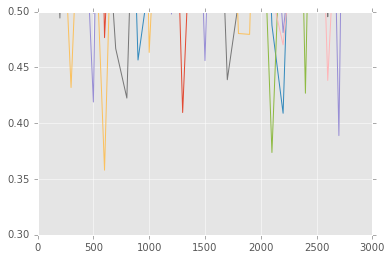

In [118]:
for i in range(len(arr)):
    plt.plot(df_arr[i]['Second'], df_arr[i]['MSE'])
plt.ylim(.3, .5)
plt.show()

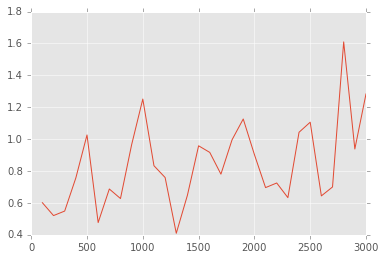

In [120]:
plt.plot(df_arr[0]['Second'], df_arr[0]['MSE'])

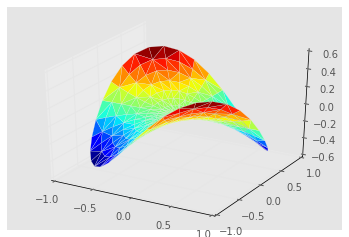

In [71]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

n_angles = 36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

plt.show()


In [75]:
z

array([ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -2.67202919e-03,  -1.06879260e-02,  -2.40459735e-02,
        -4.27394954e-02,  -6.67511389e-02,  -9.60448860e-02,
        -1.30555829e-01,  -1.70177774e-01,  -5.02175709e-03,
        -2.00857620e-02,  -4.51806186e-02,  -8.02620259e-02,
        -1.25214922e-01,  -1.79800867e-01,  -2.43591451e-01,
        -3.15889304e-01,  -6.76577185e-03,  -2.70599904e-02,
        -6.08547878e-02,  -1.08041867e-01,  -1.68340191e-01,
        -2.41168436e-01,  -3.25485696e-01,  -4.19607349e-01,
        -7.69373467e-03,  -3.07703846e-02,  -6.91889733e-02,
        -1.22790296e-01,  -1.91161433e-01,  -2.73449293e-01,
        -3.68129759e-01,  -4.72745546e-01,  -7.69373467e-03,
        -3.07703846e-02,  -6.91889733e-02,  -1.22790296e-01,
        -1.91161433e-01,  -2.73449293e-01,  -3.68129759e-01,
        -4.72745546e-01,

In [ ]:
arr np.array()